In [2]:
from basic_tools import *
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7602)

# Parsing result of partitioned LDSC

In [4]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [5]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [6]:
h2_bp8_df=pd.DataFrame([[phenotype]+(regression_result_list[-1]['h2']/regression_result_list[-1]['h2'].sum()).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_bp8_df=h2_bp8_df.set_index(0)

In [7]:
h2_value_bp8_df=pd.DataFrame([[phenotype]+(regression_result_list[-1]['h2']).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_se_bp8_df=pd.DataFrame([[phenotype]+(regression_result_list[-1]['h2_se']).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_value_bp8_df=h2_value_bp8_df.set_index(0)
h2_se_bp8_df=h2_se_bp8_df.set_index(0)

In [8]:
h2_p_bp8_df=(h2_value_bp8_df/h2_se_bp8_df).applymap(st.norm.sf)
h2_p_bp8_df.columns=regression_result_bp_list_dict['23115_irnt'][-1]['category'].apply(category_to_format,args=('padding',))

# Network

## unique phenotype

In [9]:
h2_bp8_df_temp=h2_bp8_df.copy()
edges=h2_bp8_df_temp.T.corr().mask(np.tril(np.ones(h2_bp8_df_temp.T.corr().shape)).astype(np.bool)).stack()
edges=pd.DataFrame([[edge[0][0],edge[0][1],edge[1]] for edge in edges.iteritems()],columns=['source','target','value'])

In [10]:
edges_filtered=edges.loc[(edges['value'] >0.8)]# & (edges['source'] != edges['target'])]

In [11]:
pheno_unique=h2_bp8_df.index.difference(pd.Index(edges_filtered['target'].unique()))

In [12]:
#h2_bp8_df_unique.columns

## sort by value per each loci

In [13]:
h2_bp8_df_unique=h2_bp8_df.loc[pheno_unique]

In [14]:
h2_bp8_df_unique.columns=regression_result_bp_list_dict['23115_irnt'][-1]['category'].apply(category_to_format,args=('padding',))

In [15]:
regional_cutoff=h2_bp8_df_unique.applymap(lambda x : x if x>5/(h2_bp8_df_unique.shape[1]) else np.nan)
regional_cutoff_sum=regional_cutoff.sum()

In [16]:
regional_cutoff_bool=h2_bp8_df_unique.applymap(lambda x : True if x>5/(h2_bp8_df_unique.shape[1]) else False)
regional_cutoff_bool_sum=regional_cutoff_bool.sum()

In [17]:
top_loci_index=regional_cutoff_bool_sum.sort_values(ascending=False)[:10].index
top_loci_index=sorted(top_loci_index)

## Top

In [235]:
loci_sorted_value=pd.DataFrame([row.sort_values(ascending=False).values for idx,row in regional_cutoff.T.iterrows()],index=regional_cutoff.T.index).T
loci_sorted_value_top=loci_sorted_value[top_loci_index].iloc[:10]

In [236]:
loci_sorted_value_top.index=''+(loci_sorted_value_top.index+1).astype(str)

In [237]:
#loci_values_max,loci_values_min=loci_sorted_value_top.max().max(),loci_sorted_value_top.min().min()

In [238]:
loci_sorted_desc=pd.DataFrame([row.sort_values(ascending=False).index for idx,row in regional_cutoff.T.iterrows()],index=regional_cutoff.T.index).T
loci_sorted_desc_top=loci_sorted_desc[top_loci_index].iloc[:10]

## P-value

In [239]:
loci_sorted_p_top=loci_sorted_desc_top.apply(lambda x: h2_p_bp8_df.loc[x][x.name].values)

In [240]:
loci_sorted_p_top.index=''+(loci_sorted_p_top.index+1).astype(str)

In [241]:
loci_sorted_p_top

category  bp8.04.000  bp8.06.024  bp8.06.032  bp8.08.008  bp8.16.000  \
1           0.137713    0.157390    0.157085    0.157452    0.000006   
2           0.276004    0.160458    0.153413    0.173536    0.038264   
3           0.261318    0.177804    0.207615    0.156480    0.098238   
4           0.141559    0.157307    0.186801    0.050625    0.175884   
5           0.165069    0.127944    0.157930    0.416636    0.288381   
6           0.233277    0.172372    0.144310    0.157501    0.061566   
7           0.366492    0.131695    0.160358    0.157613    0.143582   
8           0.000009    0.156643    0.123700    0.144931    0.000034   
9           0.390632    0.127523    0.082038    0.167806    0.168405   
10          0.291066    0.148538    0.178887    0.166406    0.217228   

category  bp8.16.008  bp8.16.080    bp8.17.072  bp8.19.000    bp8.20.056  
1           0.499010    0.000379  5.901651e-02    0.139141  2.063521e-01  
2           0.498048    0.144853  1.143361e-02    0.211836  1.489121e-32  
3           0.498813    0.028942  1.839755e-09    0.163649  8.702888e-02  
4           0.497333    0.132263  3.640237e-01    0.161148  4.937842e-02  
5           0.492523    0.000098  2.224400e-01    0.139825  6.307800e-02  
6           0.498585    0.000672  3.892223e-01    0.148521  3.709604e-01  
7           0.498336    0.206869  2.971353e-01    0.157932  1.611746e-01  
8           0.492304    0.217701  4.477592e-08    0.113997  1.227379e-13  
9           0.499475    0.090572  3.140187e-01    0.144635  5.425745e-03  
10          0.497982    0.217194  1.508638e-01    0.213308  2.494993e-01

# Plotting

## Old

In [25]:
plt.rcParams['font.family']='Arial'

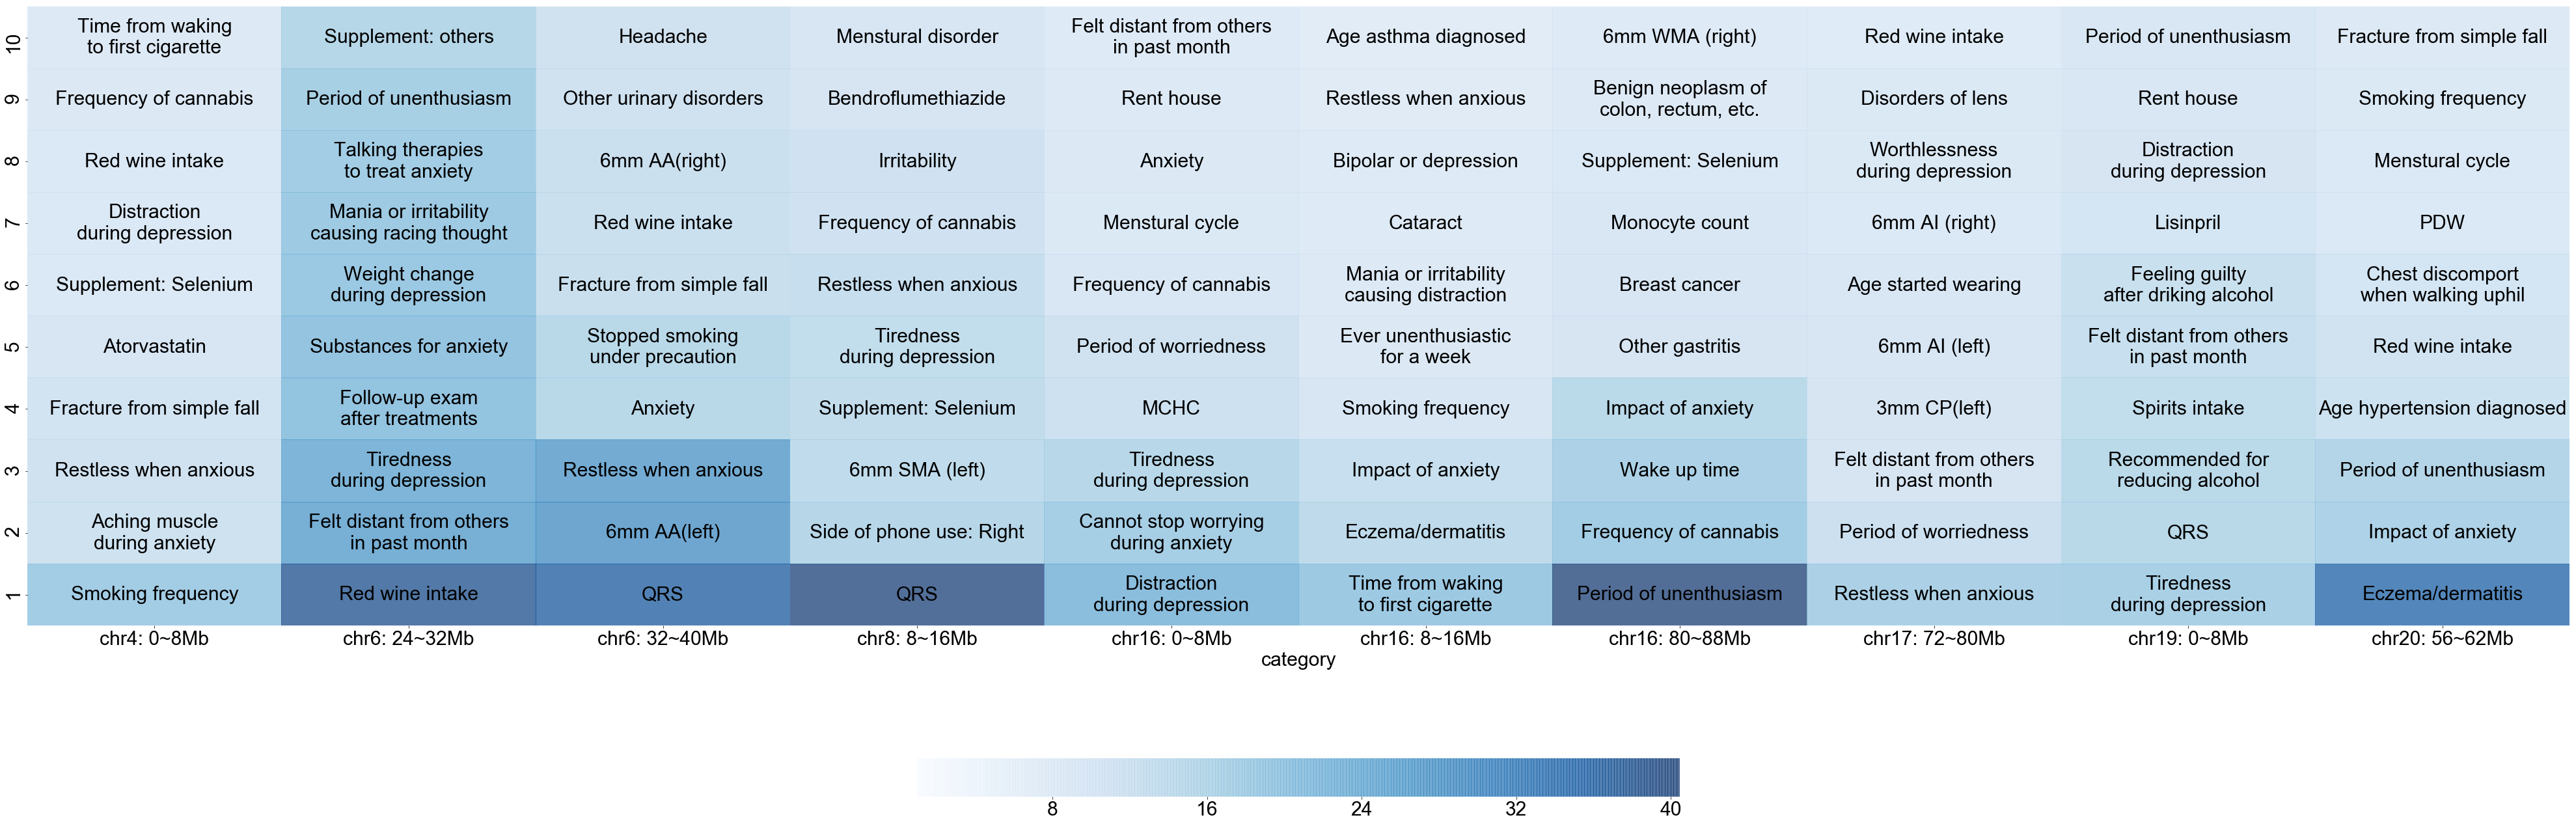

In [243]:
plt.rcParams["figure.figsize"] = (70,25)
plt.rcParams["font.size"] =30

loci_per_fig=10

for i in range(0,int(np.floor(len(top_loci_index)/loci_per_fig))+1):
    start=loci_per_fig*i
    end=np.min([loci_per_fig*i+loci_per_fig,len(top_loci_index)])
    if start==end:continue
    
    heatmap_data=loci_sorted_value_top.iloc[::-1,start:end]/(1/h2_bp8_df_unique.shape[1])
    heatmap_data.columns=heatmap_data.columns.map(lambda x: category_to_format(x,'chr_bp'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub_ori'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: code_to_description(x))
    heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub','pleiotropic'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,0:10].applymap(lambda x: code_to_description(x))
    
    
    plt.cla()
    #fig, ax = plt.subplots(1, 1)
    sns.heatmap(heatmap_data,annot=heatmap_annot,annot_kws={'color':'black'},fmt='s',vmin=1,cmap=plt.cm.Blues,cbar_kws={'orientation':"horizontal",'shrink':0.3},alpha=0.7)#vmin=1/h2_bp8_df_unique.shape[1])#.get_figure()
    #ax.set_ylabel('')
    plt.show()
    
    #print(heatmap_annot)

## New

In [180]:
plt.rcParams['font.family']='Arial'

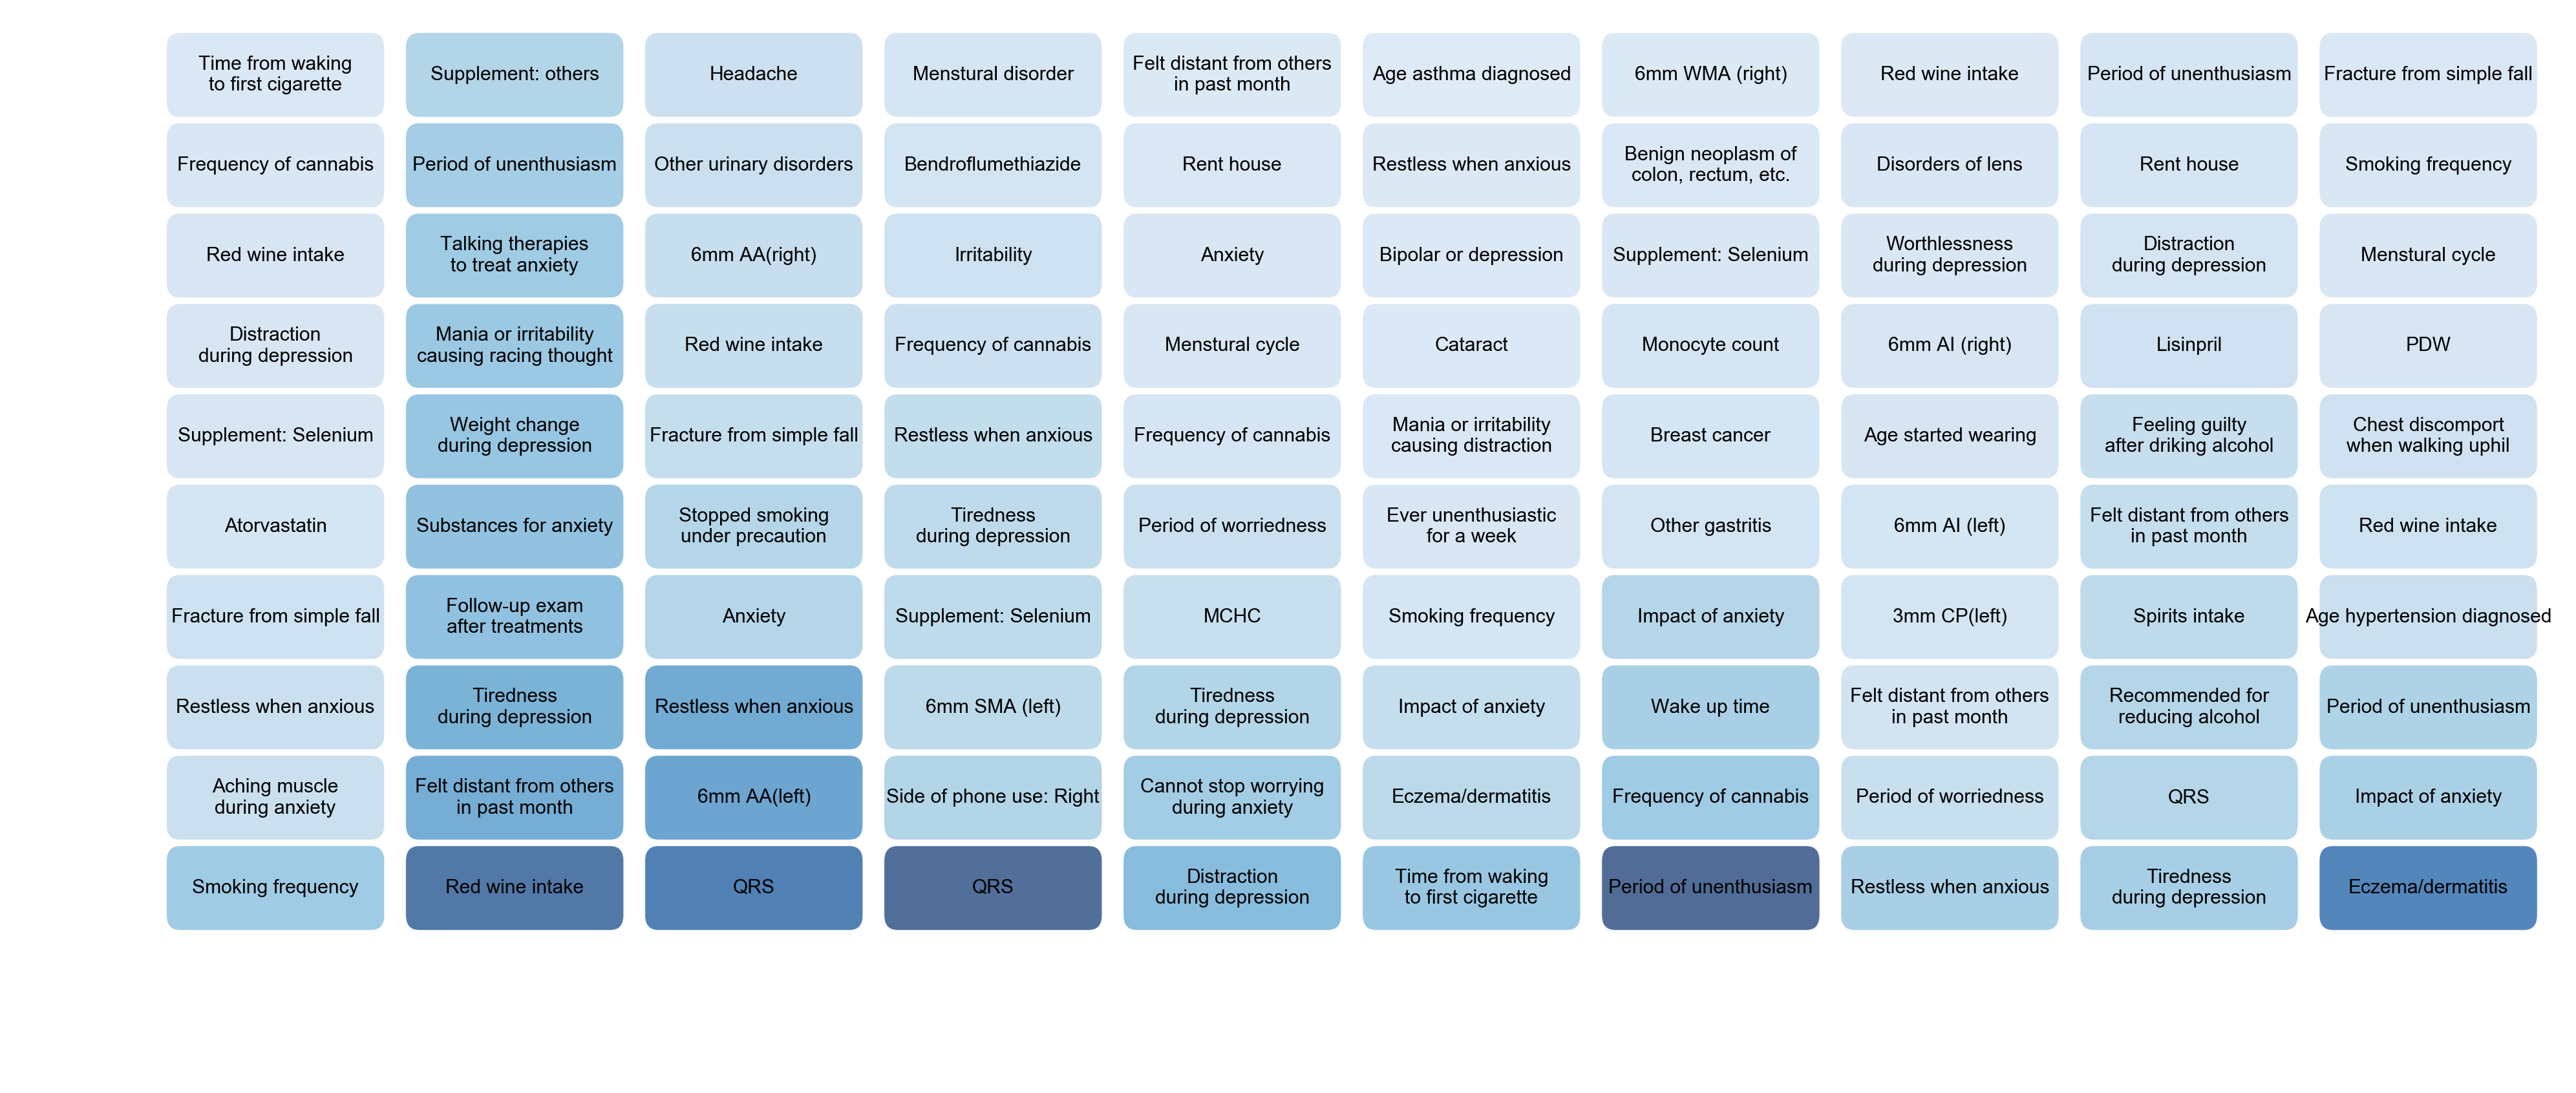

In [242]:
from matplotlib.patches import FancyBboxPatch
from matplotlib.collections import PatchCollection


plt.rcParams["figure.figsize"] = (70,30)
plt.rcParams["font.size"] =30

loci_per_fig=10

for page in range(0,int(np.floor(len(top_loci_index)/loci_per_fig))+1):
    start=loci_per_fig*page
    end=np.min([loci_per_fig*page+loci_per_fig,len(top_loci_index)])
    if start==end:continue
    
    heatmap_data=loci_sorted_value_top.iloc[::-1,start:end]/(1/h2_bp8_df_unique.shape[1])
    heatmap_data.columns=heatmap_data.columns.map(lambda x: category_to_format(x,'chr_bp'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub_ori'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: code_to_description(x))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'pub',1))
    heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub','pleiotropic'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,0:10].applymap(lambda x: code_to_description(x))

    #print(heatmap_annot)
    
    #print(heatmap_annot)
    
    #plt.cla()

    heatmap_data=heatmap_data.T
    heatmap_annot=heatmap_annot.T
    
    #print(heatmap_data.iloc[])
    
    fig,ax = plt.subplots(1)
    
    fig_x_min=0.05
    fig_x_max=0.95
    fig_y_min=0.05
    fig_y_max=0.35

    patches=[]
    colors=[]
    
    
    for i in range(heatmap_data.shape[0]):
        for j in range(heatmap_data.shape[1]):
            xy=np.array([i/heatmap_data.shape[0],1-1/heatmap_data.shape[1]-j/heatmap_data.shape[1]])
            xy=fig_x_min+(fig_x_max-fig_x_min)*xy[0],fig_y_min+(fig_y_max-fig_y_min)*xy[1]

            s=heatmap_annot.iloc[i,j]
            data=heatmap_data.iloc[i,j]
            
            width=1/heatmap_data.shape[0]*(fig_x_max-fig_x_min)*0.8
            height=1/heatmap_data.shape[1]*(fig_y_max-fig_y_min)*0.6

            plt.text(x=xy[0]+width/2,y=xy[1]+height/2,s=s,horizontalalignment='center',verticalalignment='center')        
            #print(max(data,1))
            colors.append(data)
            #print(i,j,s,data,max(data,1)/heatmap_data.max().max())
            
            patch=FancyBboxPatch(xy,width=width,height=height,boxstyle="Round,pad=0.005",facecolor=plt.cm.Blues(max(data,1)/heatmap_data.max().max()),alpha=0.7,edgecolor='white')
            #patch.add(ax)
            ax.add_artist(patch)
            #ax.add(patch)
            #patches.append(patch)
    #ax.add_patch(rect)
    
    #colors = np.linspace(0, 1, len(patches))
    #colors
    #collection = PatchCollection(patches, cmap=plt.cm.Blues, alpha=0.7,vmin=1)
    #collection.set_array(np.array(colors))
    #ax.add_collection(collection)
    #ax.add_line(line)
    
    #sns.heatmap(heatmap_data,annot=heatmap_annot,fmt='s',vmin=1)#vmin=1/h2_bp8_df_unique.shape[1])#.get_figure()
    #ax.set_ylabel('')
    
    plt.xlim(0,fig_x_max)
    plt.ylim(0,fig_y_max)
    
    plt.axis('off')
    plt.show()

    #print(heatmap_annot)

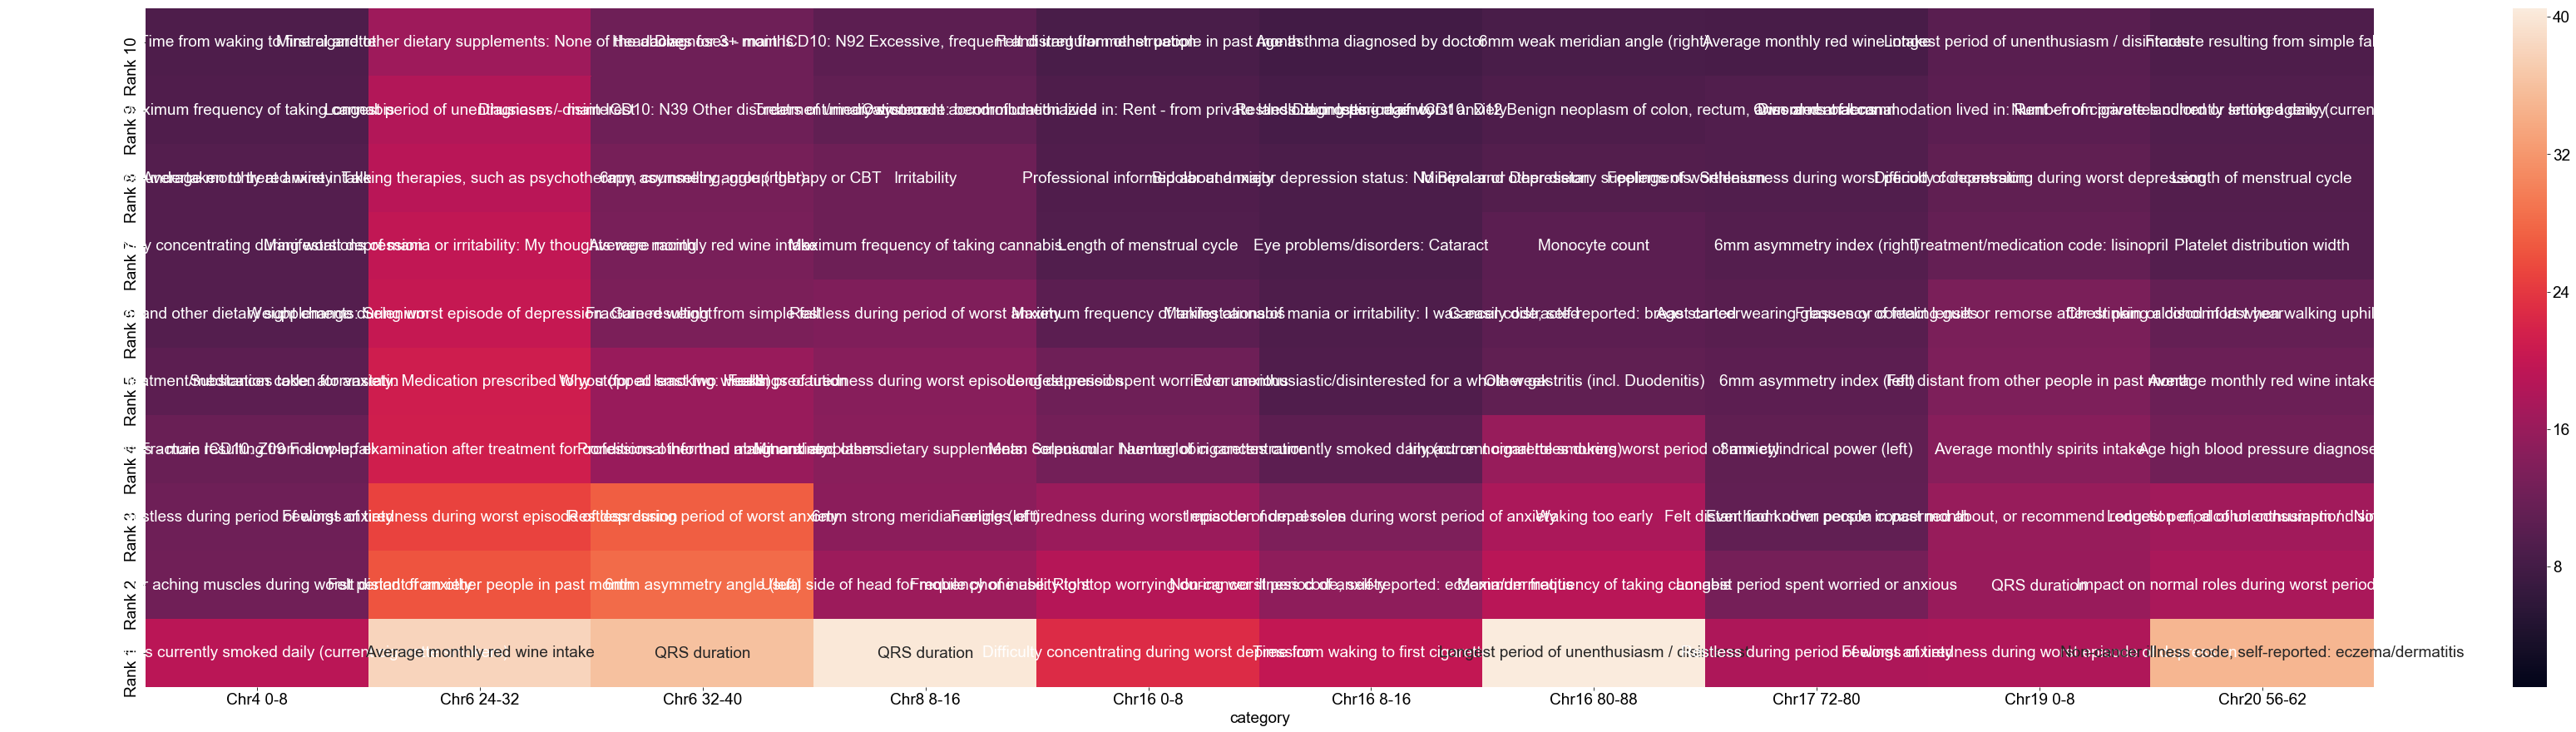

In [56]:
plt.rcParams["figure.figsize"] = (60,15)
plt.rcParams["font.size"] =19

loci_per_fig=10

for i in range(0,int(np.floor(len(top_loci_index)/loci_per_fig))+1):
    start=loci_per_fig*i
    end=np.min([loci_per_fig*i+loci_per_fig,len(top_loci_index)])
    if start==end:continue
    
    heatmap_data=loci_sorted_value_top.iloc[::-1,start:end]/(1/h2_bp8_df_unique.shape[1])
    heatmap_data.columns=heatmap_data.columns.map(lambda x: category_to_format(x,'chr_bp'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub_ori'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: code_to_description(x))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'pub',1))
    heatmap_annot=loci_sorted_desc_top.iloc[::-1,0:10].applymap(lambda x: code_to_description(x))

    #print(heatmap_annot)
    
    #print(heatmap_annot)
    
    plt.cla()
    #fig, ax = plt.subplots(1, 1)
    sns.heatmap(heatmap_data,annot=heatmap_annot,fmt='s',vmin=1)#vmin=1/h2_bp8_df_unique.shape[1])#.get_figure()
    #ax.set_ylabel('')
    plt.show()
    
    #print(heatmap_annot)

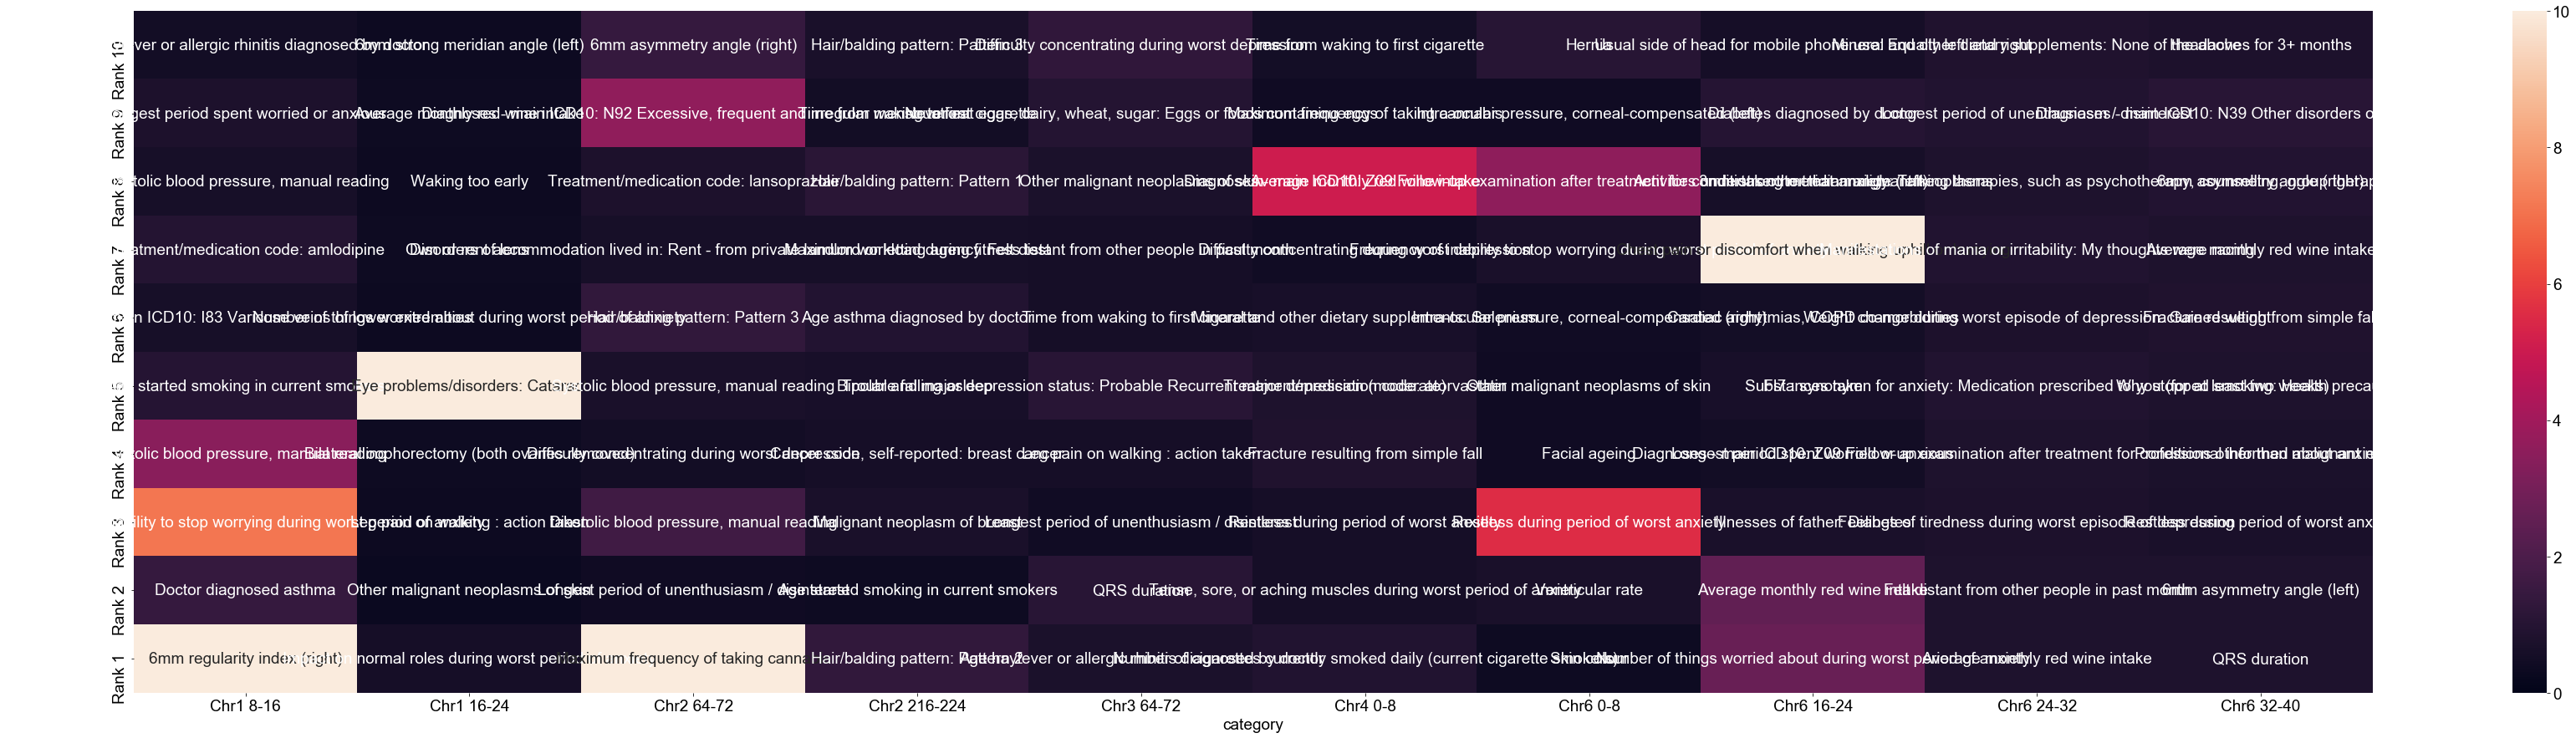

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


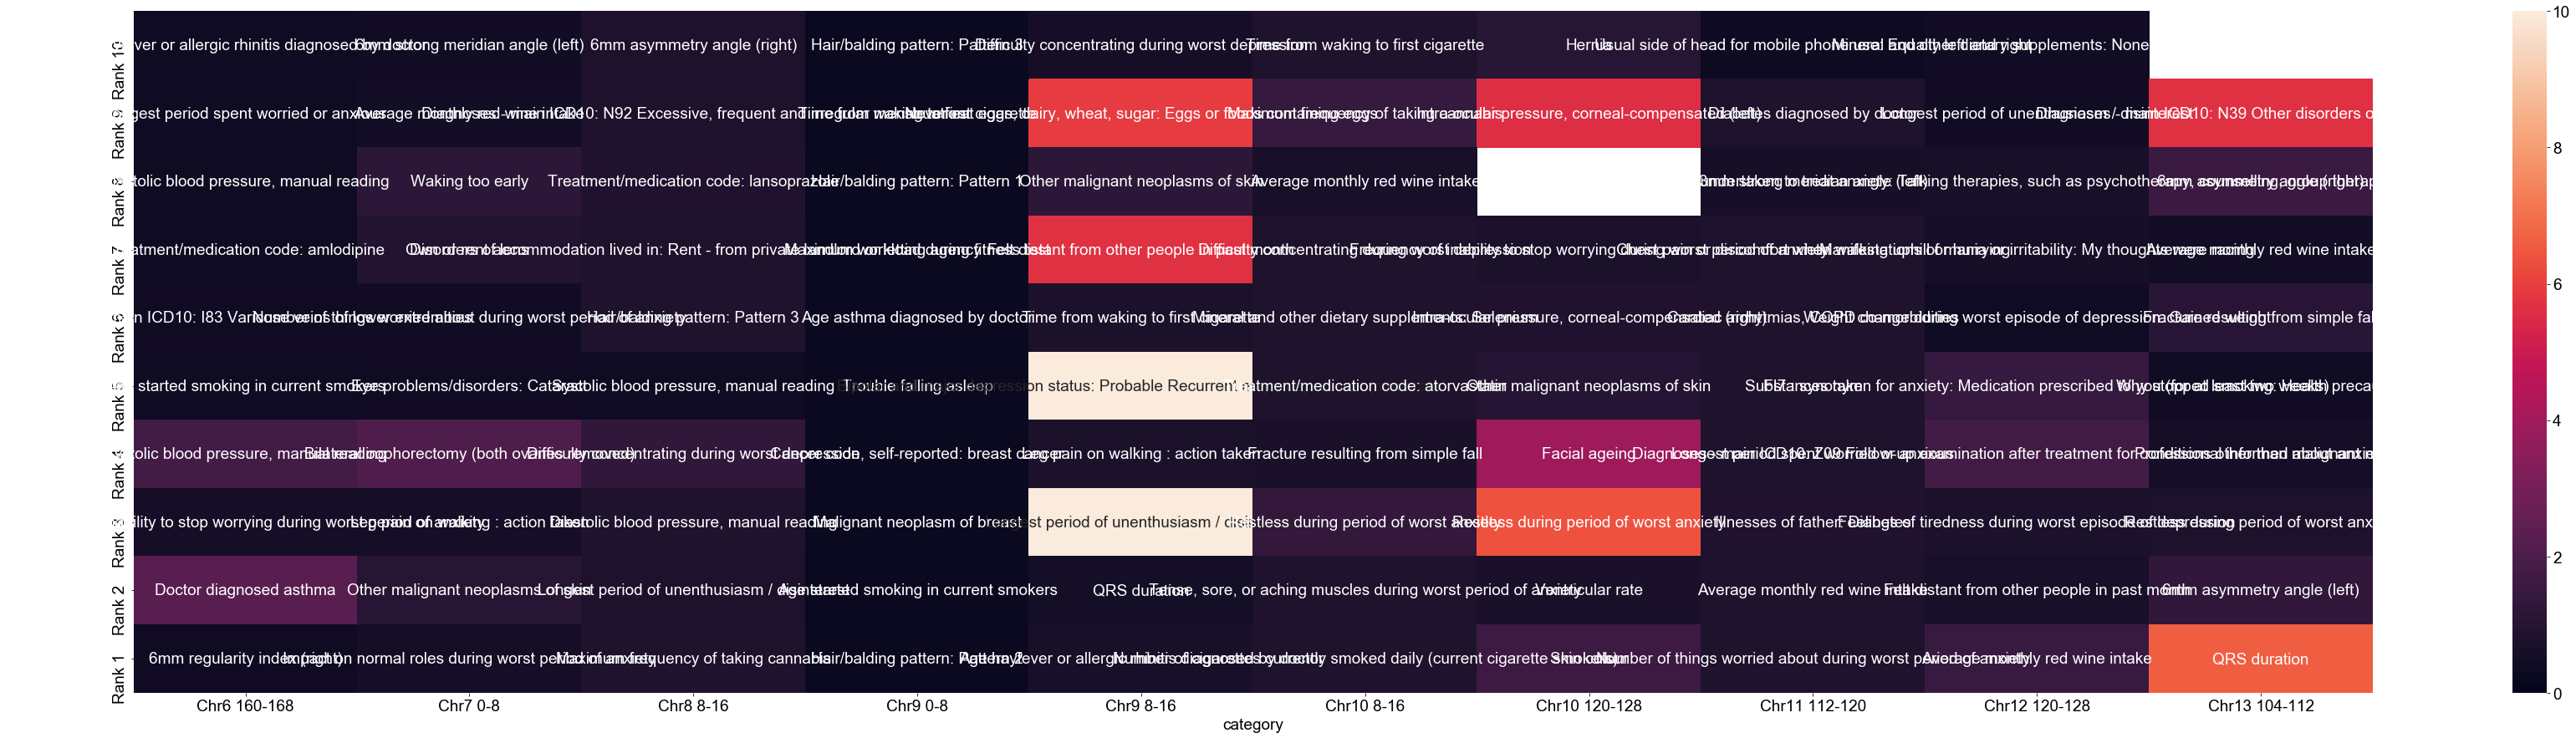

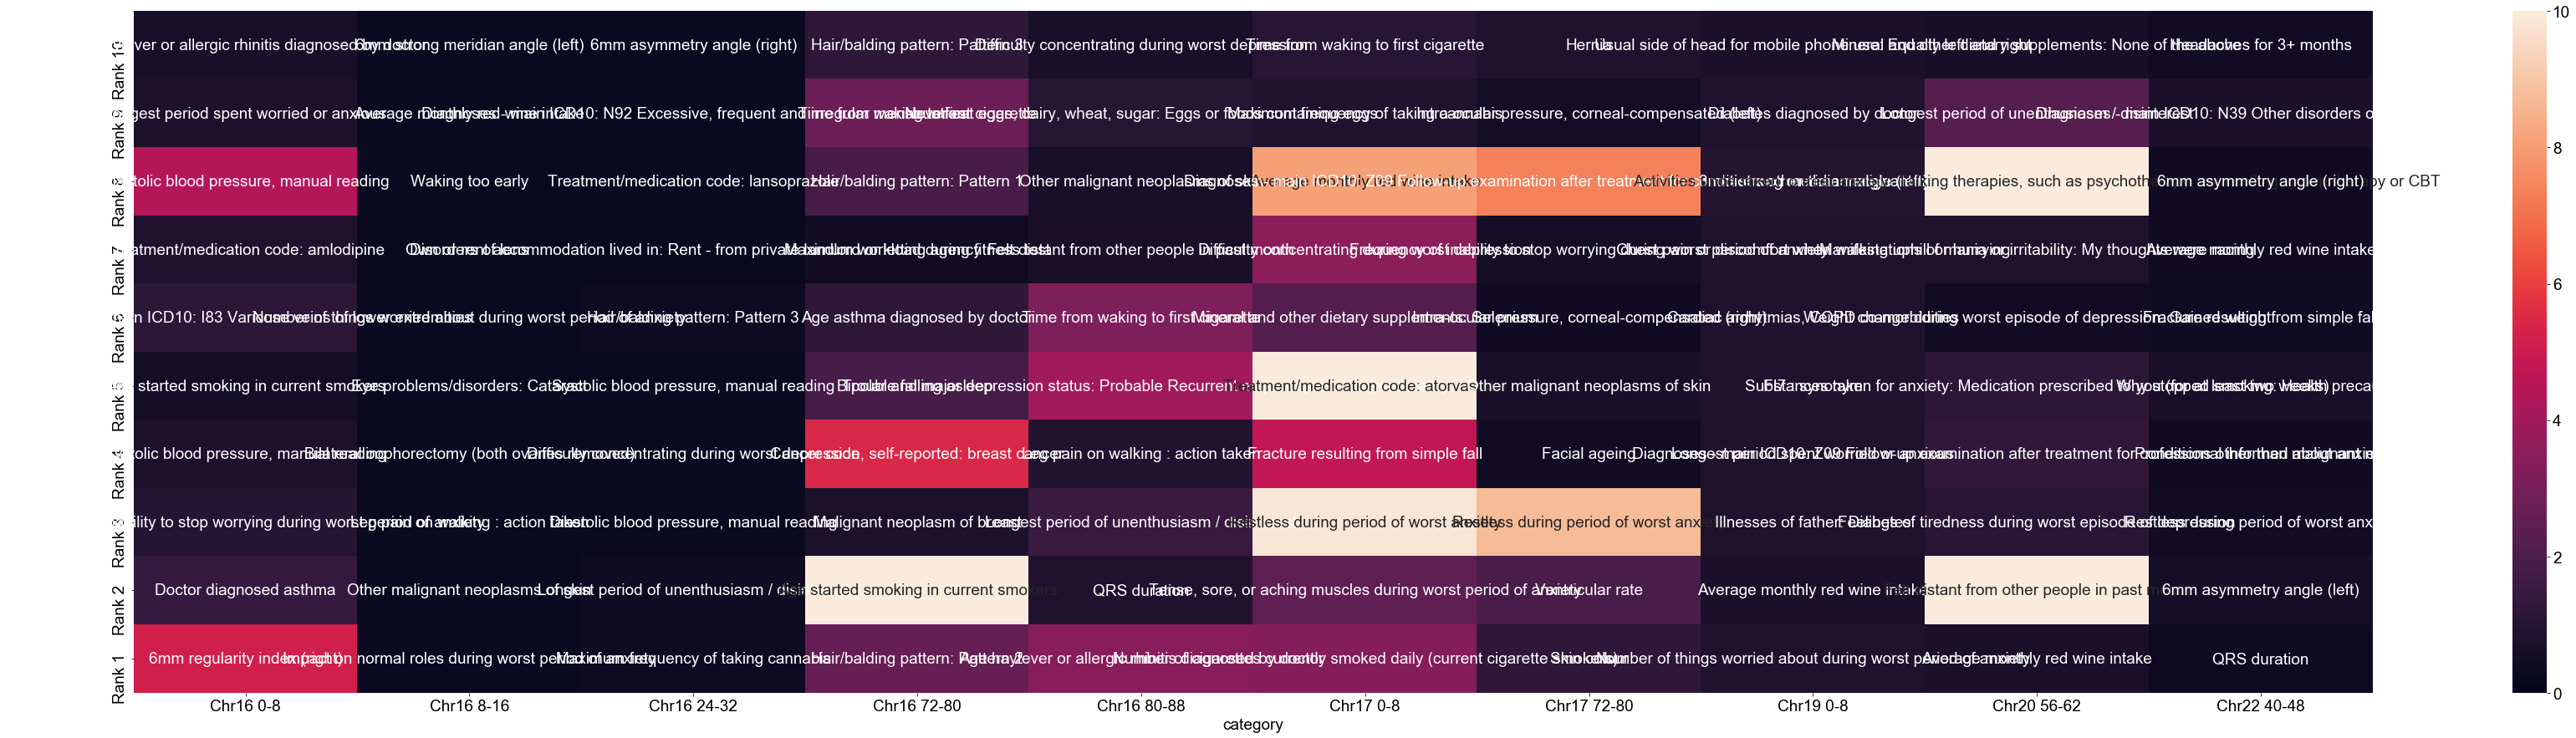

In [135]:
plt.rcParams["figure.figsize"] = (60,15)
plt.rcParams["font.size"] =19

loci_per_fig=10

for i in range(0,int(np.floor(len(top_loci_index)/loci_per_fig))+1):
    start=loci_per_fig*i
    end=np.min([loci_per_fig*i+loci_per_fig,len(top_loci_index)])
    if start==end:continue
    
    heatmap_data=-np.log10(loci_sorted_p_top.iloc[::-1,start:end])
    heatmap_data.columns=heatmap_data.columns.map(lambda x: category_to_format(x,'chr_bp'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'abbr_pub_ori'))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: code_to_description(x))
    #heatmap_annot=loci_sorted_desc_top.iloc[::-1,start:end].applymap(lambda x: description_to_short(code_to_description(x),'pub',1))
    heatmap_annot=loci_sorted_desc_top.iloc[::-1,0:10].applymap(lambda x: code_to_description(x))
    #print(heatmap_annot)
    
    plt.cla()
    #fig, ax = plt.subplots(1, 1)
    sns.heatmap(heatmap_data,annot=heatmap_annot,fmt='s',vmin=0,vmax=10)#vmin=1/h2_bp8_df_unique.shape[1])#.get_figure()
    #ax.set_ylabel('')
    plt.show()
    
    #print(heatmap_annot)

0.0028011204481792717

In [260]:
scale=20

loci_values_max=loci_sorted_values_df.iloc[:10,:][regional_cutoff_bool_sum_selected.index].iloc[0].max()
loci_values_min=loci_sorted_values_df.iloc[:10,:][regional_cutoff_bool_sum_selected.index].iloc[0].min()

for i in range(0,int(np.floor(len(regional_cutoff_bool_sum_selected)/scale))+1):
    plt.cla()
    start=scale*i
    end=np.min([scale*i+scale,len(regional_cutoff_bool_sum_selected)])
    #end=scale*i+scale if scale*i+scale<len(regional_cutoff_bool_sum_selected) else 
    print(start,end)
    plt.rcParams["figure.figsize"] = (200,30)
    plt.rcParams['font.size']=40
    heatmap_data=loci_sorted_values_df.iloc[:10,:][regional_cutoff_bool_sum_selected.index].iloc[:,start:end]
    heatmap_data.index='rank'+(heatmap_data.index+1).astype(str)
    
    #rint(snp_count_series.iloc[start:end].values.reshape(-1))
    
    #rint(heatmap_data)
    heatmap_annot=loci_sorted_desc_df.iloc[:10,:][regional_cutoff_bool_sum_selected.index].iloc[:,start:end]
    heatmap_annot=heatmap_annot.applymap(lambda x: x.split(':')[-1])
    heatmap_annot=heatmap_annot.applymap(lambda x: x.replace('/','/\n'))
    heatmap_annot=heatmap_annot.applymap(lambda x: x[:x.find(' ',int(len(x)/3))]+'\n'+x[x.find(' ',int(len(x)/3)):] if (len(x)>10 and x.find(' ',int(len(x)/3))!=-1) else x)
    heatmap_annot=heatmap_annot.applymap(lambda x: x[:x.find(' ',int(2*len(x)/3))]+'\n'+x[x.find(' ',int(2*len(x)/3)):] if(len(x)>10 and x.find(' ',int(2*len(x)/3))!=-1) else x)
    
    
    heatmap_annot.loc[10]=['{:.3f}*e-4'.format(i*10000) for i in snp_count_series.iloc[start:end]]
    heatmap_data.loc[10]=0.036
    heatmap_data.index=heatmap_data.index.to_list()[:-1]+['SNPs']
    #print(heatmap_annot.iloc[:,1])
    
    #norm=matplotlib.colors.Normalize(vmin=loci_values_min, vmax=loci_values_max)
    #sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=norm)
    
    fig=sns.heatmap(heatmap_data,annot=heatmap_annot,fmt='s',cmap=plt.cm.rainbow).get_figure()
    
    plt.show()
    fig.savefig('{}.png'.format(i))

NameError: name 'loci_sorted_values_df' is not defined